Decision Trees in Python - Quick demo
If we're going to create Decision Trees using existing packages, then it's super easy and we don't really need to write many lines of code!

Import packages. This is all you need for decision trees!

In [1]:
from sklearn import tree
import pandas as pd
from matplotlib import pyplot as plt

Reading in the data source.
File can be obtained from https://www.kaggle.com/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees
Make sure to rename the file to drug200.csv

In [2]:
training_data = pd.read_csv('drug200.csv')

Checking out the dataset.
In this problem, we're trying to predict which drug is successful for an individual given certain characteristics. So the Drug column is our target Label.

In [3]:
training_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


If we want to pass our dataset to the DecisionTreeClassifier, we have to separate the features from the labels.
In other words, put the input variables in one dataframe, and the target variables in another dataframe.

In [4]:
X = training_data.drop('Drug', axis = 1).copy()

We can see that the Drug column has been dropped.

In [5]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


If we tried to pass this dataframe to the classifier, we would get an Error.
The problem is the fact that Sklearn can't handle Nominal/Categorical Variables unless
One-hot encoding has been done.

In [6]:
X = pd.get_dummies(X) #conduct one-hot encoding for the categorical variables

In [7]:
X.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0


Make a dataframe out of the Drug column only.

In [8]:
Y = training_data['Drug'].copy()

In [9]:
Y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

Create and train a Decision Tree Classifier.

In [10]:
Classifier = tree.DecisionTreeClassifier()
Classifier.fit(X, Y)

DecisionTreeClassifier()

[Text(1860.0, 2446.2, 'Na_to_K <= 14.829\ngini = 0.694\nsamples = 200\nvalue = [23, 16, 16, 54, 91]\nclass = DrugY'),
 Text(1550.0, 1902.6, 'BP_HIGH <= 0.5\ngini = 0.667\nsamples = 109\nvalue = [23, 16, 16, 54, 0]\nclass = DrugX'),
 Text(930.0, 1359.0, 'BP_NORMAL <= 0.5\ngini = 0.353\nsamples = 70\nvalue = [0, 0, 16, 54, 0]\nclass = DrugX'),
 Text(620.0, 815.3999999999999, 'Cholesterol_NORMAL <= 0.5\ngini = 0.498\nsamples = 34\nvalue = [0, 0, 16, 18, 0]\nclass = DrugX'),
 Text(310.0, 271.7999999999997, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 16, 0, 0]\nclass = DrugC'),
 Text(930.0, 271.7999999999997, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 0, 18, 0]\nclass = DrugX'),
 Text(1240.0, 815.3999999999999, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 0, 36, 0]\nclass = DrugX'),
 Text(2170.0, 1359.0, 'Age <= 50.5\ngini = 0.484\nsamples = 39\nvalue = [23, 16, 0, 0, 0]\nclass = DrugA'),
 Text(1860.0, 815.3999999999999, 'gini = 0.0\nsamples = 23\nvalue = [23, 0, 0, 0, 0]\nclass = DrugA'),
 Text(

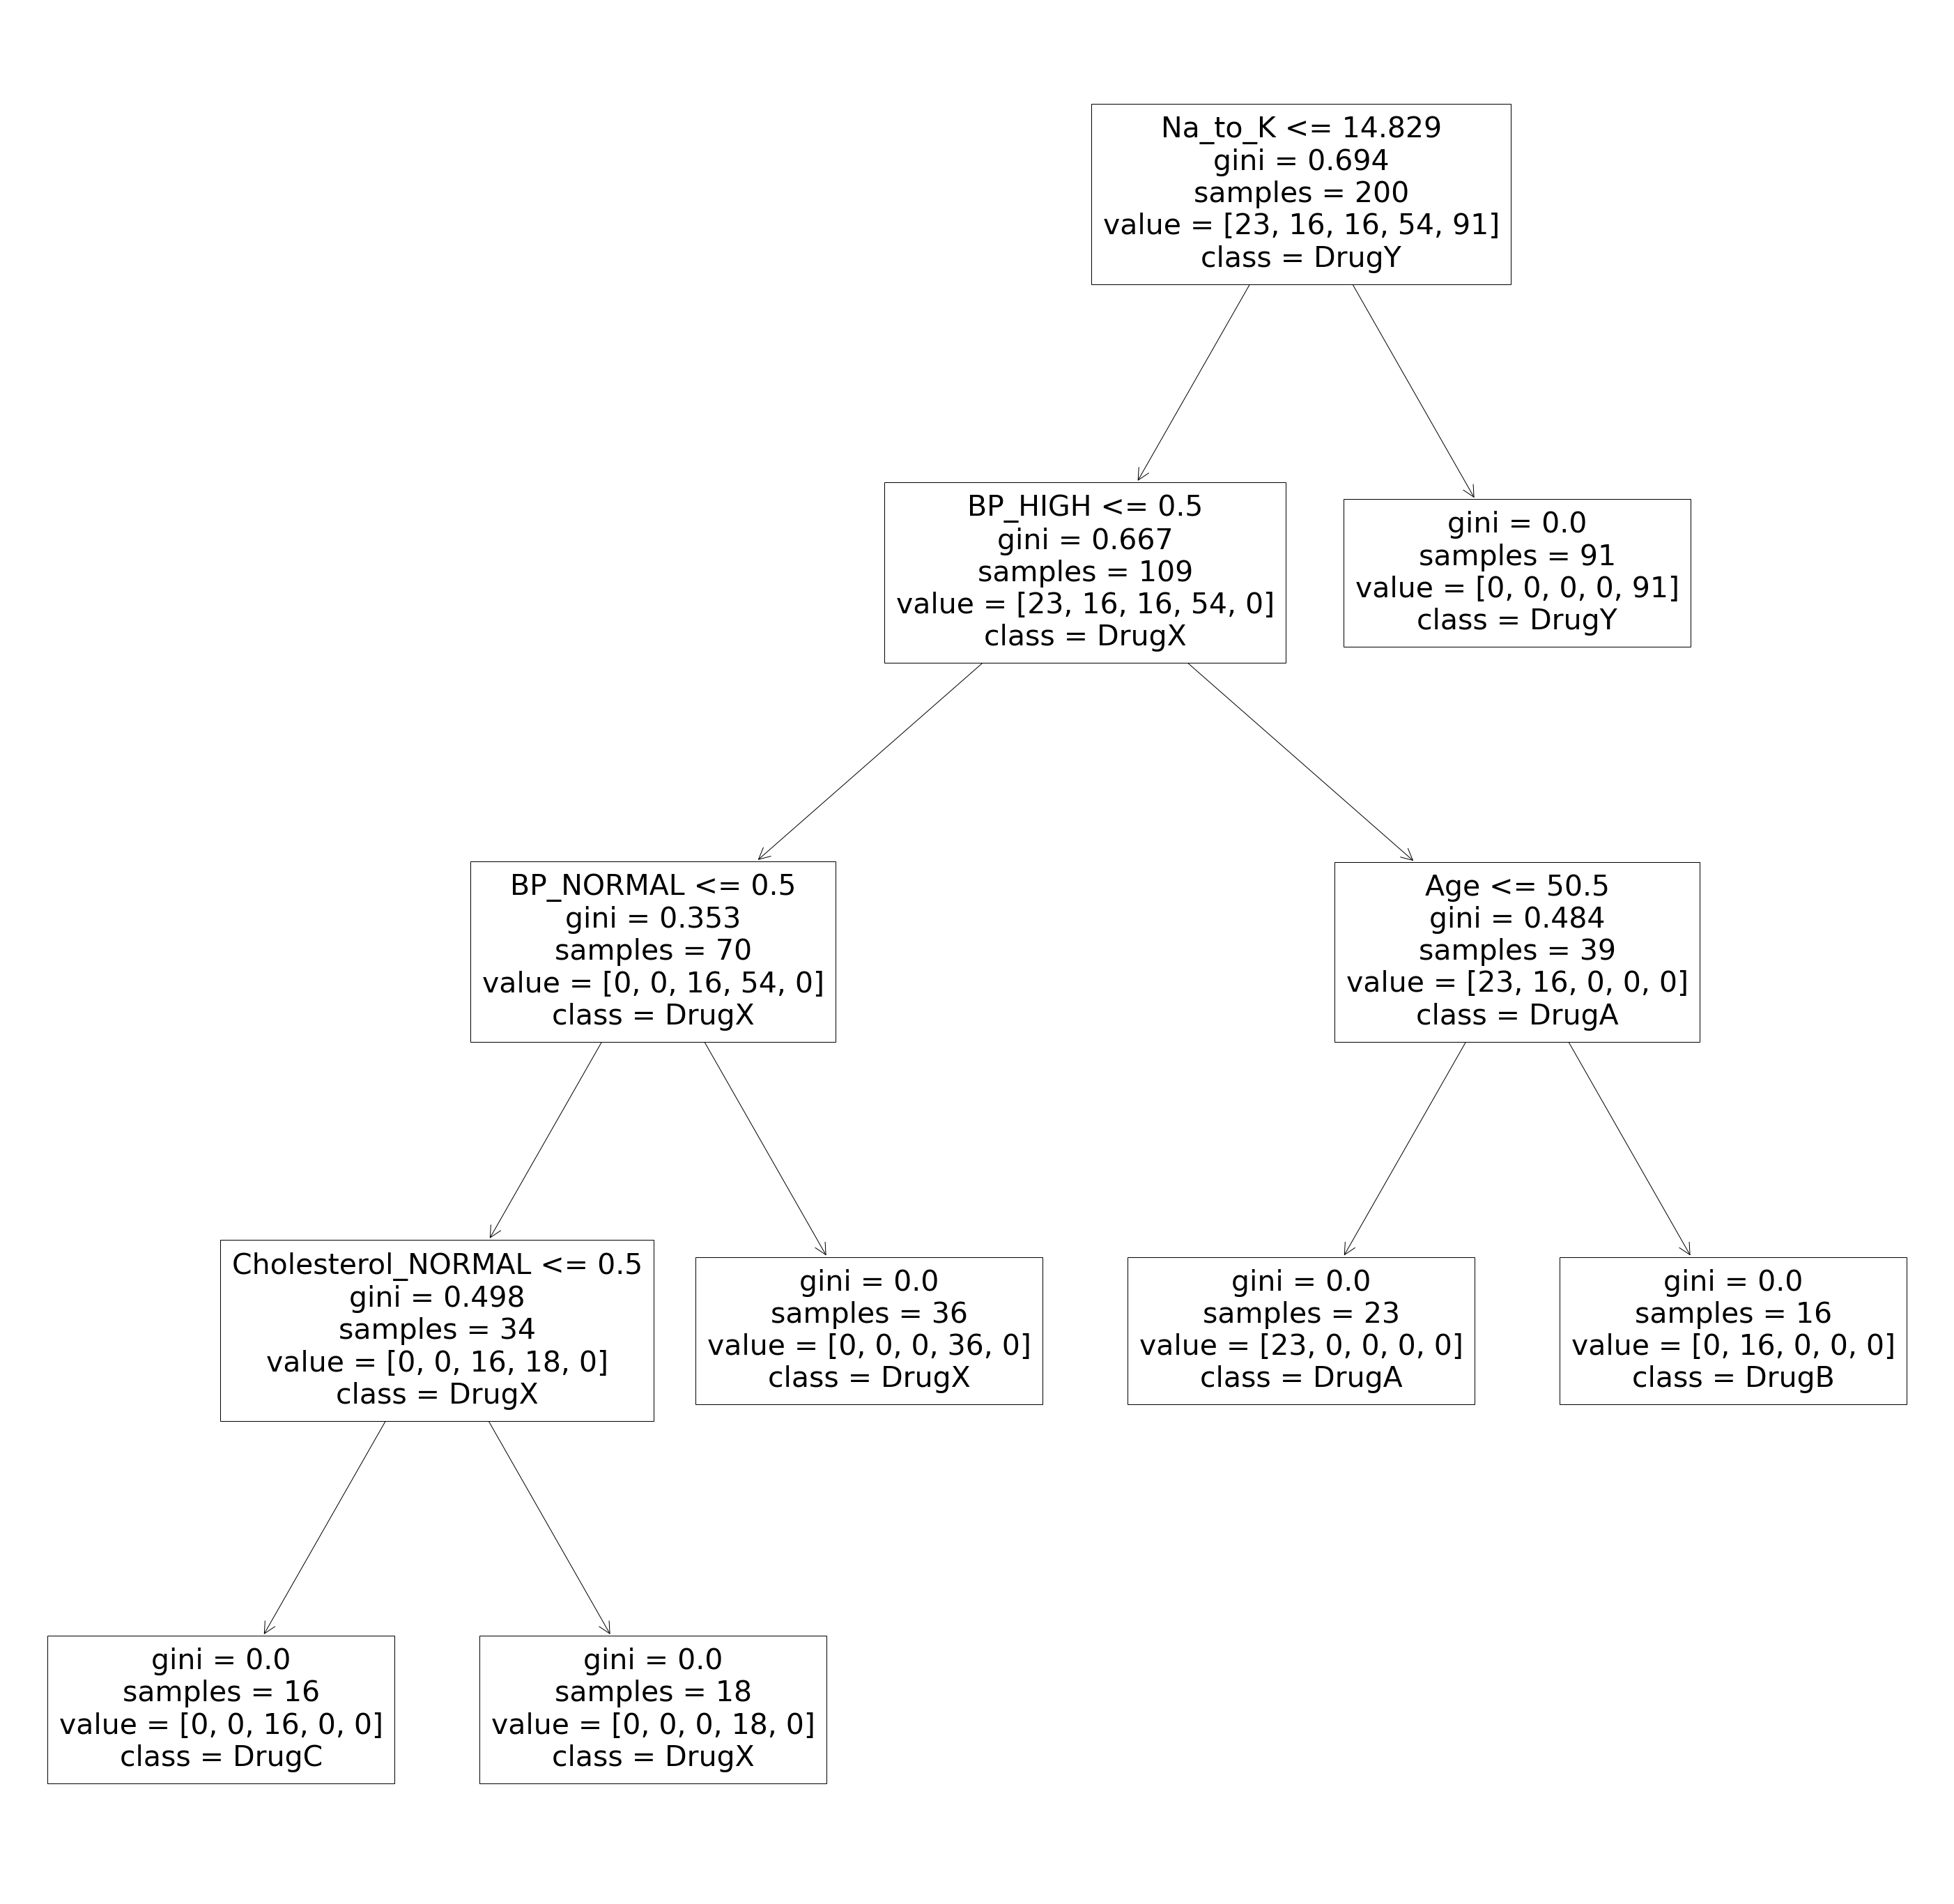

In [15]:
plt.figure(figsize = (50, 50))
tree.plot_tree(Classifier, class_names = ['DrugA', 'DrugB', 'DrugC', 'DrugX', 'DrugY'], feature_names = X.columns)